UB Bern Digitale Toolbox  
2020  
Autor: Michael Horn

---

# Bilder als tabellarische Datensätze

Dieses Notebook soll Methoden aufzeigen, die es erlauben, Bilder als tabellarische Datensätze zu interpretieren.

### Inhalt:
- "mathematische" Bilderzeugung und Visualisierung
- Bilder speichern und laden
- Umwandlung von Bildern in tabellarische Datensätze

Die in diesem Notebook verwendeten Libraries:

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from skimage import io

### "Mathematische" Bilderzeugung und Visualisierung

In diesem Abschnitt zeigen wir eine Methode, mit der man Arrays erzeugt und verändert. Diese Arrays können als Bilder visualisiert und gespeichert werden.

Zunächst generieren wir ein Array **zeros_frame**, mit 5 Zeilen und 3 Spalten, der nur Nullwerte enthält:

In [2]:
zeros_frame = np.zeros([5,3], dtype = int)
print(zeros_frame)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


Wir können dieses Array mit **matplotlib** als Bild visualisieren:

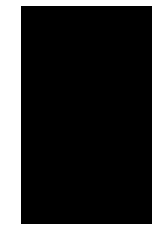

In [3]:
plt.imshow(zeros_frame, cmap="gray")
plt.axis("off")
plt.show()

Da **zeros_frame** nur Nullwerte enthält, sehen wir ein komplett schwarzes Bild. Matplotlib interpretiert die Nullen als Pixelwerte mit der Intensität 0. Solche Pixel werden schwarz dargestellt. Wir haben somit ein komplett schwarzes Bild aus 15 Pixeln erzeugt. 

Wir können einige Pixelwerte verändern und schauen, was passiert:

In [4]:
mixed_frame = np.zeros([5,3], dtype = int)
mixed_frame[1,1] = 255 
mixed_frame[3,2] = 255 
print(mixed_frame)

[[  0   0   0]
 [  0 255   0]
 [  0   0   0]
 [  0   0 255]
 [  0   0   0]]


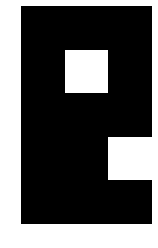

In [5]:
plt.imshow(mixed_frame, cmap="gray")
plt.axis("off")
plt.show()

An den Stellen im Array, an denen wir den Wert 0 durch den Wert 255 ersetzt haben, ist der entsprechende Pixel jetzt weiss.  
Bei 8-bit Bildern hat man eine Intensitätsspanne zwischen 0 (schwarz) und 255 (weiss). Intensitätswerte dazwischen werden grau dargestellt: 

[[  0   0   0]
 [  0 255 100]
 [  0   0   0]
 [  0   0 255]
 [  0 200   0]]


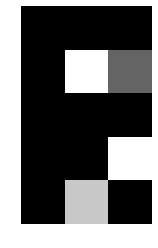

In [6]:
gray_frame = np.zeros([5,3], dtype = int)
gray_frame[1,1] = 255 
gray_frame[1,2] = 100 
gray_frame[3,2] = 255 
gray_frame[4,1] = 200 
print(gray_frame)
plt.imshow(gray_frame, cmap="gray")
plt.axis("off")
plt.show()

Jetzt generieren wir Arrays, welche die Zahlen 0-9 (wie sie in digitalen Displays erscheinen) darstellen. Wir beschränken uns auf Pixel mit Intensitäten 0 (schwarz) und 255 (weiss).

In [7]:
# Um die Zahl 0 zu erzeugen:
zero_frame = np.zeros([5,3], dtype = int)
zero_frame[0,0] = 0
zero_frame[0,1] = 0
zero_frame[0,2] = 0
zero_frame[1,0] = 0
zero_frame[1,1] = 255
zero_frame[1,2] = 0
zero_frame[2,0] = 0
zero_frame[2,1] = 255
zero_frame[2,2] = 0
zero_frame[3,0] = 0
zero_frame[3,1] = 255
zero_frame[3,2] = 0
zero_frame[4,0] = 0
zero_frame[4,1] = 0
zero_frame[4,2] = 0

In [8]:
# Wir schauen uns das Array an:
print(zero_frame)

[[  0   0   0]
 [  0 255   0]
 [  0 255   0]
 [  0 255   0]
 [  0   0   0]]


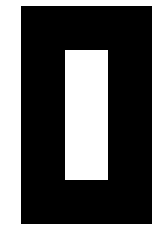

In [9]:
# Wir schauen uns das visualisierte Array an:
plt.imshow(zero_frame, cmap="gray")
plt.axis("off")
plt.show()

Das gleiche nun für die anderen Ziffern:

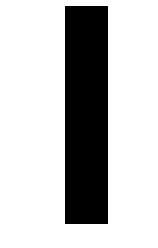

In [10]:
one_frame = np.zeros([5,3], dtype = int)

one_frame[0,0] = 255
one_frame[0,1] = 0
one_frame[0,2] = 255
one_frame[1,0] = 255
one_frame[1,1] = 0
one_frame[1,2] = 255
one_frame[2,0] = 255
one_frame[2,1] = 0
one_frame[2,2] = 255
one_frame[3,0] = 255
one_frame[3,1] = 0
one_frame[3,2] = 255
one_frame[4,0] = 255
one_frame[4,1] = 0
one_frame[4,2] = 255

plt.imshow(one_frame, cmap="gray")
plt.axis("off")
plt.show()

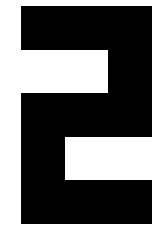

In [11]:
two_frame = np.zeros([5,3], dtype = int)

two_frame[0,0] = 0
two_frame[0,1] = 0
two_frame[0,2] = 0
two_frame[1,0] = 255
two_frame[1,1] = 255
two_frame[1,2] = 0
two_frame[2,0] = 0
two_frame[2,1] = 0
two_frame[2,2] = 0
two_frame[3,0] = 0
two_frame[3,1] = 255
two_frame[3,2] = 255
two_frame[4,0] = 0
two_frame[4,1] = 0
two_frame[4,2] = 0

plt.imshow(two_frame, cmap="gray")
plt.axis("off")
plt.show()

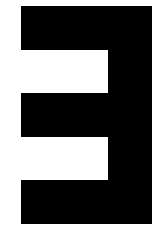

In [12]:
three_frame = np.zeros([5,3], dtype = int)

three_frame[0,0] = 0
three_frame[0,1] = 0
three_frame[0,2] = 0
three_frame[1,0] = 255
three_frame[1,1] = 255
three_frame[1,2] = 0
three_frame[2,0] = 0
three_frame[2,1] = 0
three_frame[2,2] = 0
three_frame[3,0] = 255
three_frame[3,1] = 255
three_frame[3,2] = 0
three_frame[4,0] = 0
three_frame[4,1] = 0
three_frame[4,2] = 0

plt.imshow(three_frame, cmap="gray")
plt.axis("off")
plt.show()

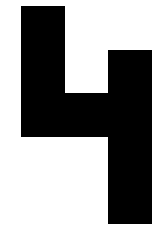

In [13]:
four_frame = np.zeros([5,3], dtype = int)

four_frame[0,0] = 0
four_frame[0,1] = 255
four_frame[0,2] = 255
four_frame[1,0] = 0
four_frame[1,1] = 255
four_frame[1,2] = 0
four_frame[2,0] = 0
four_frame[2,1] = 0
four_frame[2,2] = 0
four_frame[3,0] = 255
four_frame[3,1] = 255
four_frame[3,2] = 0
four_frame[4,0] = 255
four_frame[4,1] = 255
four_frame[4,2] = 0

plt.imshow(four_frame, cmap="gray")
plt.axis("off")
plt.show()

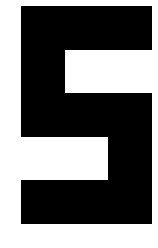

In [14]:
five_frame = np.zeros([5,3], dtype = int)

five_frame[0,0] = 0
five_frame[0,1] = 0
five_frame[0,2] = 0
five_frame[1,0] = 0
five_frame[1,1] = 255
five_frame[1,2] = 255
five_frame[2,0] = 0
five_frame[2,1] = 0
five_frame[2,2] = 0
five_frame[3,0] = 255
five_frame[3,1] = 255
five_frame[3,2] = 0
five_frame[4,0] = 0
five_frame[4,1] = 0
five_frame[4,2] = 0

plt.imshow(five_frame, cmap="gray")
plt.axis("off")
plt.show()

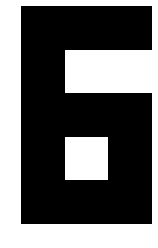

In [15]:
six_frame = np.zeros([5,3], dtype = int)

six_frame[0,0] = 0
six_frame[0,1] = 0
six_frame[0,2] = 0
six_frame[1,0] = 0
six_frame[1,1] = 255
six_frame[1,2] = 255
six_frame[2,0] = 0
six_frame[2,1] = 0
six_frame[2,2] = 0
six_frame[3,0] = 0
six_frame[3,1] = 255
six_frame[3,2] = 0
six_frame[4,0] = 0
six_frame[4,1] = 0
six_frame[4,2] = 0

plt.imshow(six_frame, cmap="gray")
plt.axis("off")
plt.show()

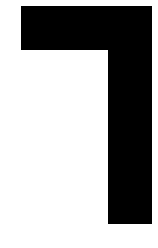

In [16]:
seven_frame = np.zeros([5,3], dtype = int)

seven_frame[0,0] = 0
seven_frame[0,1] = 0
seven_frame[0,2] = 0
seven_frame[1,0] = 255
seven_frame[1,1] = 255
seven_frame[1,2] = 0
seven_frame[2,0] = 255
seven_frame[2,1] = 255
seven_frame[2,2] = 0
seven_frame[3,0] = 255
seven_frame[3,1] = 255
seven_frame[3,2] = 0
seven_frame[4,0] = 255
seven_frame[4,1] = 255
seven_frame[4,2] = 0

plt.imshow(seven_frame, cmap="gray")
plt.axis("off")
plt.show()

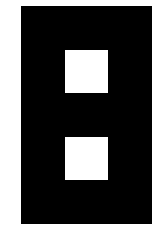

In [17]:
eight_frame = np.zeros([5,3], dtype = int)

eight_frame[0,0] = 0
eight_frame[0,1] = 0
eight_frame[0,2] = 0
eight_frame[1,0] = 0
eight_frame[1,1] = 255
eight_frame[1,2] = 0
eight_frame[2,0] = 0
eight_frame[2,1] = 0
eight_frame[2,2] = 0
eight_frame[3,0] = 0
eight_frame[3,1] = 255
eight_frame[3,2] = 0
eight_frame[4,0] = 0
eight_frame[4,1] = 0
eight_frame[4,2] = 0

plt.imshow(eight_frame, cmap="gray")
plt.axis("off")
plt.show()

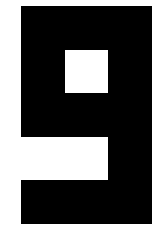

In [18]:
nine_frame = np.zeros([5,3], dtype = int)

nine_frame[0,0] = 0
nine_frame[0,1] = 0
nine_frame[0,2] = 0
nine_frame[1,0] = 0
nine_frame[1,1] = 255
nine_frame[1,2] = 0
nine_frame[2,0] = 0
nine_frame[2,1] = 0
nine_frame[2,2] = 0
nine_frame[3,0] = 255
nine_frame[3,1] = 255
nine_frame[3,2] = 0
nine_frame[4,0] = 0
nine_frame[4,1] = 0
nine_frame[4,2] = 0

plt.imshow(nine_frame, cmap="gray")
plt.axis("off")
plt.show()

Nun wollen wir uns alle Zahlen mal zusammen ansehen:

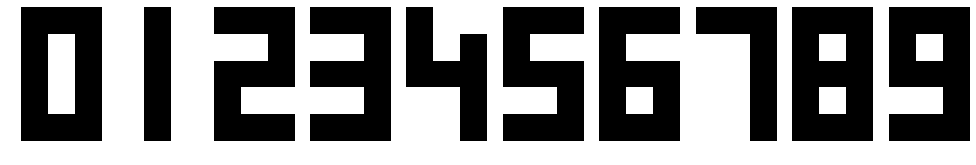

In [19]:
plt.figure(figsize=(17,10))

plt.subplot(1,10,1)
plt.imshow(zero_frame, cmap = "gray") 
plt.axis("off")

plt.subplot(1,10,2)
plt.imshow(one_frame, cmap = "gray")
plt.axis("off")

plt.subplot(1,10,3)
plt.imshow(two_frame, cmap = "gray") 
plt.axis("off")

plt.subplot(1,10,4)
plt.imshow(three_frame, cmap = "gray")
plt.axis("off")

plt.subplot(1,10,5)
plt.imshow(four_frame, cmap = "gray") 
plt.axis("off")

plt.subplot(1,10,6)
plt.imshow(five_frame, cmap = "gray") 
plt.axis("off")

plt.subplot(1,10,7)
plt.imshow(six_frame, cmap = "gray")
plt.axis("off")

plt.subplot(1,10,8)
plt.imshow(seven_frame, cmap = "gray") 
plt.axis("off")

plt.subplot(1,10,9)
plt.imshow(eight_frame, cmap = "gray")
plt.axis("off")

plt.subplot(1,10,10)
plt.imshow(nine_frame, cmap = "gray")
plt.axis("off")

plt.show()

### Speichern und Laden der Bilder

Wir können die erzeugten Arrays als Bilder abspeichern, z.B. im .png Format.  
Dazu definieren wir zuerst einen Pfad, damit Python weiss, wo die Bilder abgespeichert werden sollen.  
Der Pfad kann folgendermassen aussehen:

In [20]:
save_path = "/Users/Michael/Anaconda3/Jupiter_Notebooks/Toolbox/Data_Formats/Picture_Formats_Data/"

Mit einer Python-Library zur Bildbearbearbeitung können wir die erzeugten Arrays als Bilder speichern und wieder laden.
Eine beliebte Library ist **skimage**. Diese haben wir oben importiert.

Mit der Methode **imsave** lassen sich die Arrays als Bilder abspeichern:

In [21]:
io.imsave(save_path + "000.png", zero_frame, check_contrast=False)
io.imsave(save_path + "001.png", one_frame, check_contrast=False)
io.imsave(save_path + "002.png", two_frame, check_contrast=False)
io.imsave(save_path + "003.png", three_frame, check_contrast=False)
io.imsave(save_path + "004.png", four_frame, check_contrast=False)
io.imsave(save_path + "005.png", five_frame, check_contrast=False)
io.imsave(save_path + "006.png", six_frame, check_contrast=False)
io.imsave(save_path + "007.png", seven_frame, check_contrast=False)
io.imsave(save_path + "008.png", eight_frame, check_contrast=False)
io.imsave(save_path + "009.png", nine_frame, check_contrast=False)

C:\Users\Michael\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: /Users/Michael/Anaconda3/Jupiter_Notebooks/Toolbox/Data_Formats/Picture_Formats_Data/000.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Michael\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: /Users/Michael/Anaconda3/Jupiter_Notebooks/Toolbox/Data_Formats/Picture_Formats_Data/001.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Michael\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: /Users/Michael/Anaconda3/Jupiter_Notebooks/Toolbox/Data_Formats/Picture_Formats_Data/002.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Michael\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: /Users/Michael/Anaconda3/Jupiter_Notebooks/Toolbox/Data_Formats/Picture_Formats_Data/003.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Michael\Anaconda3\l

Man kann im entsprechenden Ordner überprüfen:
- die Bilder sind 3x5 Pixel gross
- die Bit-Tiefe ist 8

Die Bilder lassen sich im Notebook laden und visualisieren:

In [22]:
# Laden:
image_zero = io.imread(save_path + "000.png")

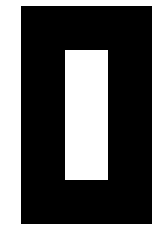

In [23]:
# Visualisieren:
plt.imshow(image_zero, cmap="gray")
plt.axis("off")
plt.show()

Wie man sieht, ist die ursprüngliche Form der Arrays erhalten geblieben:

In [24]:
print("Initial Array: ")
print(" ")
print(zero_frame) # das ist das ursprüngliche Numpy Array
print(" ")
print("---------------")
print(" ")
print("Loaded Image: ")
print(" ")
print(image_zero) # das ist das als .png-Bild abgespeicherte und wieder geladene Numpy-Array

Initial Array: 
 
[[  0   0   0]
 [  0 255   0]
 [  0 255   0]
 [  0 255   0]
 [  0   0   0]]
 
---------------
 
Loaded Image: 
 
[[  0   0   0]
 [  0 255   0]
 [  0 255   0]
 [  0 255   0]
 [  0   0   0]]


### Umwandlung von Bildern in tabellarische Datensätze

Wie wir gesehen haben, sind Bilder letztlich nichts anderes als Arrays von Zahlen, welche die Intensitätswerte der Pixel angeben.
Reihen wir die einzelnen Zeilen eines Arrays in eine einzige Zeile auf, bekommen wir ein Datenformat, wie wir es von Tabellen her kennen: eine Zeile (für jedes Bild) und in diesem Fall 15 Spalten (für jeden Pixelwert eines Bildes eine Spalte).

Ein solches Datenformat lässt sich bequem in ein .csv-File speichern.  
Um ein solches File zu generieren, erzeugen wir aus dem Array von Pixeln eine Liste, in welcher die Pixelwerte nacheinander aufgereiht und mit Kommanta getrennt sind. Der erste Wert in der Liste entspricht dem Pixel oben links im Array, der letzte Wert in der Liste dem Pixel unten rechts im Array.  
Das Ziel ist eine Liste, die für die Pixelwerte eines Bildes beispielsweise folgendermassen aussieht:   
[0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0]

Um das zu erreichen, schreiben wir eine kleine Funktion, die die Pixelwerte in eine solche Form bringt:

In [25]:
# Die Funktion merge_lists nimmt als Input eine Liste von Listen (als so etwas kann man ein Array verstehen) 
# und gibt als Output eine fusionierte Liste:

def merge_lists(liste):
    merged_list = []
    for item in liste:
        merged_list.extend(item)
    return merged_list

Wir testen die Funktion an einem Beispiel, dem oben geladenen Bild **image_zero**:

In [26]:
merge_lists(image_zero)

[0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0]

Das hat geklappt, die Liste hat das Format, welches wir wollen.

Nun können wir alle Bilder, die wir vorhin gespeichert haben, in dieses Format bringen:

In [27]:
data_list = []

for item in os.listdir(save_path):
    if item.endswith("png"):
        image_arr = io.imread(save_path + item)
        image_l = merge_lists(image_arr)
        data_list.append(image_l)
    else:
        pass

In der Liste **data_list** haben wir nun die Pixelwerte aller Bilder aufgelistet. Die erste Zeile entspricht dabei den Werten des ersten Bildes (also der Null), die zweite Zeile den Werten des zweiten Bildes (der Eins) u.s.w.

In [28]:
data_list

[[0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0],
 [255, 0, 255, 255, 0, 255, 255, 0, 255, 255, 0, 255, 255, 0, 255],
 [0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0],
 [0, 0, 0, 255, 255, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0],
 [0, 255, 255, 0, 255, 0, 0, 0, 0, 255, 255, 0, 255, 255, 0],
 [0, 0, 0, 0, 255, 255, 0, 0, 0, 255, 255, 0, 0, 0, 0],
 [0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 255, 0, 0, 0, 0],
 [0, 0, 0, 255, 255, 0, 255, 255, 0, 255, 255, 0, 255, 255, 0],
 [0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0],
 [0, 0, 0, 0, 255, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0]]

Nun können wir die Werte aus dieser Liste in ein .csv-File schreiben, das wir lokal als **digits_0-9.csv** File abspeichern.

In [29]:
with open(save_path + "digits_0-9.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(data_list)

Die für Datenverarbeitungsaufgaben mit Python beliebte Library **pandas** (die wir oben importiert haben), kann uns das soeben abgespeicherte File öffnen und uns den Inhalt zeigen:

In [30]:
pd.read_csv(save_path + "digits_0-9.csv", header = None, 
            names = ["px1", "px2", "px3", "px4", "px5", "px6", "px7", 
                     "px8", "px9", "px10", "px11", "px12", "px13", "px14", "px15"])

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,px11,px12,px13,px14,px15
0,0,0,0,0,255,0,0,255,0,0,255,0,0,0,0
1,255,0,255,255,0,255,255,0,255,255,0,255,255,0,255
2,0,0,0,255,255,0,0,0,0,0,255,255,0,0,0
3,0,0,0,255,255,0,0,0,0,255,255,0,0,0,0
4,0,255,255,0,255,0,0,0,0,255,255,0,255,255,0
5,0,0,0,0,255,255,0,0,0,255,255,0,0,0,0
6,0,0,0,0,255,255,0,0,0,0,255,0,0,0,0
7,0,0,0,255,255,0,255,255,0,255,255,0,255,255,0
8,0,0,0,0,255,0,0,0,0,0,255,0,0,0,0
9,0,0,0,0,255,0,0,0,0,255,255,0,0,0,0


Wir sehen also, wie wir den Informationsgehalt von Bildern (d.h. die Pixelwerte und deren Position im Bild) in eine Tabellenform bringen können. Solche tabellarischen Formate können für die weitere Datenanalyse sehr nützlich sein, beispielsweise wenn man Datensätze für maschinelles Lernen verwenden möchte.

### Visualisierung tabellarischer Datansätze als Bilder

Schliesslich zeigen wir noch, dass die im .csv-Format gespeicherten Pixelwerte sehr einfach in Arrays zurückverwandelt und als Bilder visualisiert werden können:

In [31]:
data_file = open(save_path + "digits_0-9.csv", "r")
data_list = data_file.readlines()
data_file.close()

Für den ersten Datenpunkt im .csv-File:

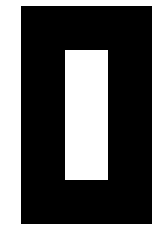

In [32]:
data_element_0 = data_list[0].split(",")
image_array_0 = np.asfarray(data_element_0).reshape((5,3))
plt.imshow(image_array_0, cmap="gray")
plt.axis("off")
plt.show()

Für alle Datenpunkte im .csv-File:

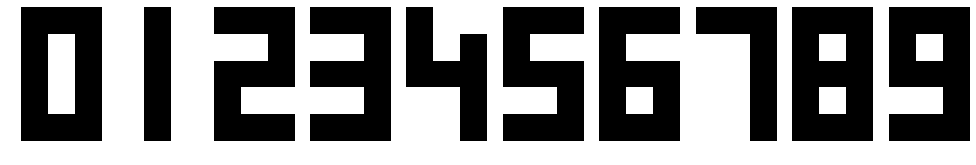

In [33]:
plt.figure(figsize=(17,10))

for index in range (0,10):
    data_element = data_list[index].split(",")
    image_array = np.asfarray(data_element).reshape((5,3))
    
    plt.subplot(1,10,index + 1)
    plt.imshow(image_array, cmap = "gray") 
    plt.axis("off")

plt.show()